In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [5]:
df.shape

(303, 14)

In [6]:
z = np.abs(stats.zscore(df))
z

array([[0.9521966 , 0.68100522, 1.97312292, ..., 0.71442887, 2.14887271,
        0.91452919],
       [1.91531289, 0.68100522, 1.00257707, ..., 0.71442887, 0.51292188,
        0.91452919],
       [1.47415758, 1.46841752, 0.03203122, ..., 0.71442887, 0.51292188,
        0.91452919],
       ...,
       [1.50364073, 0.68100522, 0.93851463, ..., 1.24459328, 1.12302895,
        1.09345881],
       [0.29046364, 0.68100522, 0.93851463, ..., 0.26508221, 1.12302895,
        1.09345881],
       [0.29046364, 1.46841752, 0.03203122, ..., 0.26508221, 0.51292188,
        1.09345881]])

In [7]:
df1 = df[(z < 3).all(axis=1)]

In [8]:
df1.shape

(287, 14)

In [9]:
df1.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

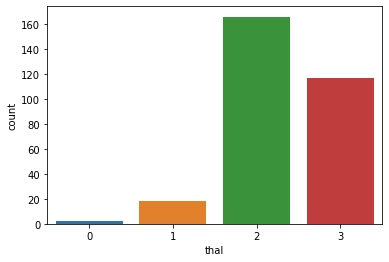

In [10]:
sns.countplot(x='thal',data=df);

In [11]:
df1['thal'] = df1['thal'].replace([0],2)

<ipython-input-11-fb33116e5611>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['thal'] = df1['thal'].replace([0],2)


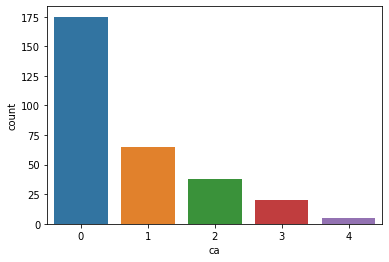

In [12]:
sns.countplot(x='ca',data=df);

In [13]:
df1['ca'] = df1['ca'].replace([4],0)

<ipython-input-13-6d09f4877ba5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['ca'] = df1['ca'].replace([4],0)


In [14]:
df1['sex']=df1['sex'].astype('category')
df1['cp']=df1['cp'].astype('category')
df1['fbs']=df1['fbs'].astype('category')
df1['restecg']=df1['restecg'].astype('category')
df1['exang']=df1['exang'].astype('category')
df1['slope']=df1['slope'].astype('category')
df1['ca']=df1['ca'].astype('category')
df1['thal']=df1['thal'].astype('category')
df1['target']=df1['target'].astype('category')

<ipython-input-14-d9a78069777c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['sex']=df1['sex'].astype('category')
<ipython-input-14-d9a78069777c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['cp']=df1['cp'].astype('category')
<ipython-input-14-d9a78069777c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

In [15]:
df1.dtypes

age            int64
sex         category
cp          category
trestbps       int64
chol           int64
fbs         category
restecg     category
thalach        int64
exang       category
oldpeak      float64
slope       category
ca          category
thal        category
target      category
dtype: object

**Logistic Regression CV**

In [16]:
X = df1.drop('target',axis=1)
y = df1['target']

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [17]:
from sklearn.linear_model import LogisticRegressionCV

In [18]:
model = LogisticRegressionCV()

In [19]:
model.fit(scaled_X_train, y_train)

LogisticRegressionCV()

In [20]:
model.C_

array([21.5443469])

In [21]:
y_pred = model.predict(X_test)

In [22]:
model.coef_

array([[ 0.05800885, -0.84122973,  0.76194159, -0.24476117, -0.27558314,
         0.18213476,  0.1812399 ,  0.59999219, -0.49010458, -0.52145705,
         0.4437573 , -1.16399802, -0.5996616 ]])

In [23]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [24]:
y_pred = model.predict(scaled_X_test)

In [25]:
accuracy_score(y_test,y_pred)

0.896551724137931

In [26]:
confusion_matrix(y_test,y_pred)

array([[13,  1],
       [ 2, 13]], dtype=int64)

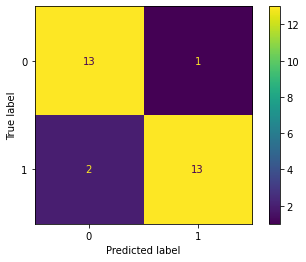

In [27]:
plot_confusion_matrix(model,scaled_X_test,y_test)

In [28]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90        14
           1       0.93      0.87      0.90        15

    accuracy                           0.90        29
   macro avg       0.90      0.90      0.90        29
weighted avg       0.90      0.90      0.90        29



In [29]:
from sklearn.metrics import precision_recall_curve,plot_precision_recall_curve,plot_roc_curve

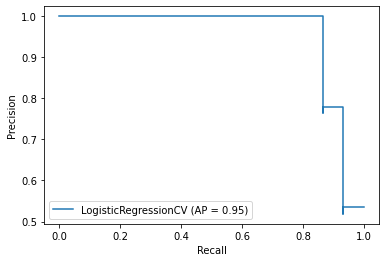

In [30]:
plot_precision_recall_curve(model,scaled_X_test,y_test)

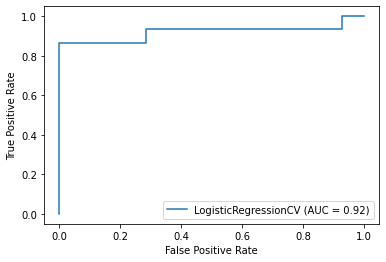

In [31]:
plot_roc_curve(model,scaled_X_test,y_test)

In [32]:
model.coef_

array([[ 0.05800885, -0.84122973,  0.76194159, -0.24476117, -0.27558314,
         0.18213476,  0.1812399 ,  0.59999219, -0.49010458, -0.52145705,
         0.4437573 , -1.16399802, -0.5996616 ]])

In [33]:
from joblib import dump

In [34]:
dump(scaler,"heart_scaler.pkl")

['heart_scaler.pkl']

In [35]:
dump(model,"heart_model.h5")

['heart_model.h5']

In [36]:
from joblib import dump, load

heart_model = load("heart_model.h5")

heart_scaler = load("heart_scaler.pkl")

def return_prediction(model,scaler,sample_json):
    
    age = sample_json['age']
    sex = sample_json['sex']
    cp = sample_json['cp']
    trestbps = sample_json['trestbps']
    chol = sample_json['chol']
    fbs = sample_json['fbs']
    restecg = sample_json['restecg']
    thalach = sample_json['thalach']
    exang = sample_json['exang']
    oldpeak = sample_json['oldpeak']
    slope = sample_json['slope']
    ca = sample_json['ca']
    thal = sample_json['thal']
    
    heart = [[age,sex,cp,trestbps,chol,fbs,restecg,thalach,
       exang,oldpeak,slope,ca,thal]]
    
    heart = scaler.transform(heart)
    
    prediction= model.predict(heart)

    return prediction[0]

In [37]:
heart_pred = {'age':63,
              'sex':1,
              'cp':3,
              'trestbps':145,
              'chol':233,
              'fbs':1,
              'restecg':0,
              'thalach':150,
              'exang':0,
              'oldpeak':2.3,
              'slope':0,
              'ca':0,
              'thal':1}             

In [38]:
prediction = return_prediction(heart_model,heart_scaler,heart_pred)

In [39]:
prediction 

1